In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

sns.set_theme()
sns.set_style("whitegrid")
sns.set_context(
    "paper", rc={"axes.legendsize": 20, "axes.labelsize": 20, "axes.xtickssize": 20}
)

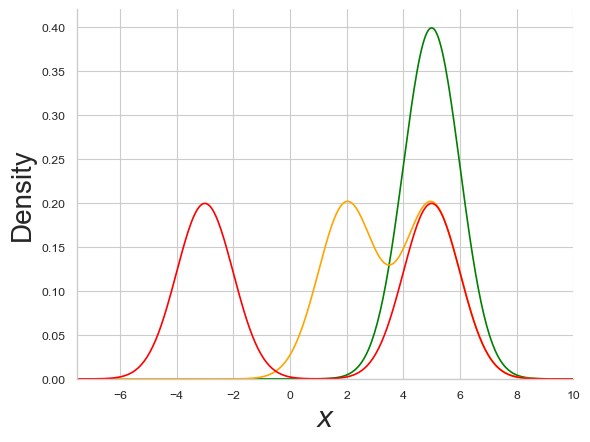

In [172]:
x = np.linspace(-10, 10, 400)
mu0 = 5

plt.plot(
    x,
    norm.pdf(x, loc=(2 * mu0 - mu0), scale=1) / 2 + norm.pdf(x, loc=mu0, scale=1) / 2,
    label=r"$X^\star_5$",
    color="green",
)

plt.plot(
    x,
    norm.pdf(x, loc=(2 * 3.5 - mu0), scale=1) / 2 + norm.pdf(x, loc=mu0, scale=1) / 2,
    label=r"$X^\star_{7/2}$",
    color="orange",
)

plt.plot(
    x,
    norm.pdf(x, loc=(2 * 1 - mu0), scale=1) / 2 + norm.pdf(x, loc=mu0, scale=1) / 2,
    label=r"$X^\star_1$",
    color="red",
)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlim(-7.5, 10)
plt.ylim(0, 0.42)
plt.xlabel(r"$x$")
plt.ylabel("Density")
plt.savefig(
    "./plots/densities_r.pdf",
    bbox_inches="tight",
    transparent=True,
)

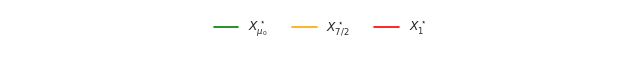

In [180]:
# Create a new figure just for the legend
plt.figure(figsize=(8, 0.5))

# Create dummy lines with the same properties as your original plots
plt.plot([], [], color="green", label=r"$X^\star_{\mu_0}$")
plt.plot([], [], color="orange", label=r"$X^\star_{7/2}$")
plt.plot([], [], color="red", label=r"$X^\star_1$")

# Configure the legend
legend = plt.legend(
    bbox_to_anchor=(0.5, 0.5),
    loc="center",
    ncol=3,  # Arrange items horizontally
    frameon=False,  # Remove the frame
    borderaxespad=0,
)

# Remove axes
plt.gca().set_axis_off()

# Save the legend
plt.savefig(
    "./plots/legend_r.pdf",
    bbox_inches="tight",
    transparent=True,
)

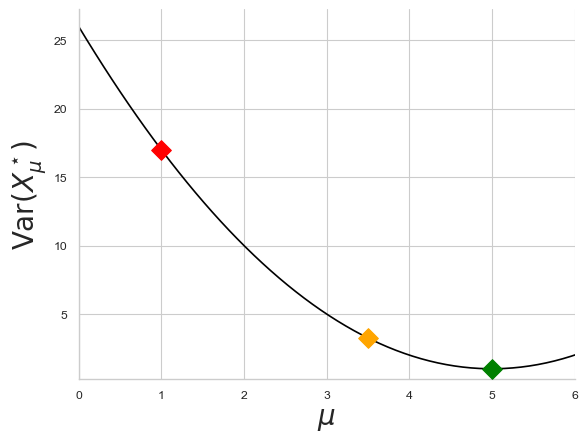

In [170]:
x = np.linspace(-10, 10, 400)
mu0 = 5

x = np.linspace(0, 2 * mu0, 100)
plt.plot(
    x,
    1 + x**2 - 2 * mu0 * x + mu0**2,
    label=r"$\text{Var}(X^\star_\mu)$",
    zorder=1,
    color="black",
)
plt.scatter(
    [1],
    [(1 + 1.0**2 - 2 * mu0 * 1.0 + mu0**2)],
    color="red",
    marker="D",
    s=100,
    zorder=10,
)
plt.scatter(
    [3.5],
    [(1 + 3.5**2 - 2 * mu0 * 3.5 + mu0**2)],
    color="orange",
    marker="D",
    s=100,
    zorder=10,
)
plt.scatter(
    [mu0],
    [1],
    color="green",
    marker="D",
    s=100,
    zorder=10,
)
plt.xlim(0, 6)
plt.ylim(0.26)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.grid(zorder=0)
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\text{Var}(X^\star_\mu)$")
plt.savefig(
    "./plots/var_r.pdf",
    bbox_inches="tight",
    transparent=True,
)

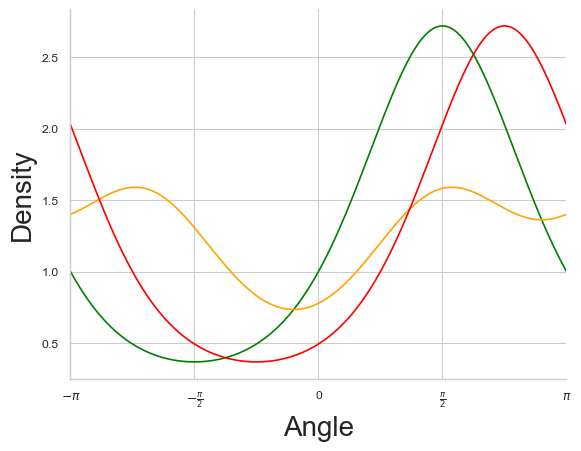

In [173]:
def angle_diff(a, b):
    return (a - b + np.pi) % (2 * np.pi) - np.pi


x = np.linspace(-np.pi, np.pi, 400)

# x_mirr = 2*mu - x = angle_diff(2*mu, x)

mu0 = np.pi / 2

plt.plot(
    x,
    np.exp(np.cos(x - mu0)),
    label=r"$X^\star_{\pi/2}$",
    color="green",
)

mirr_x = angle_diff(2 * (9 * np.pi / 10), x)
plt.plot(
    x,
    np.exp(np.cos(mirr_x - mu0)) / 2 + np.exp(np.cos(x - mu0)) / 2,
    label=r"$X^\star_{9\pi/10}$",
    color="orange",
)

mirr_x = angle_diff(2 * (-3 * np.pi / 8), x)
plt.plot(
    x,
    np.exp(np.cos(mirr_x - mu0)),
    label=r"$X^\star_{-3\pi/8}$",
    color="red",
)
plt.xlabel("Angle")
plt.xticks(
    np.linspace(-np.pi, np.pi, 5),
    [r"$-\pi$", r"$-\frac{\pi}{2}$"] + ["0"] + [r"$\frac{\pi}{2}$", r"$\pi$"],
)
plt.xlim(-np.pi, np.pi)
plt.ylabel("Density")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig(
    "./plots/densities_circle.pdf",
    bbox_inches="tight",
    transparent=True,
)

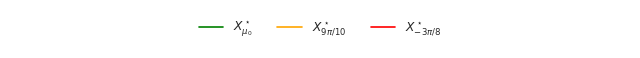

In [181]:
# Create a new figure just for the legend
plt.figure(figsize=(8, 0.5))

# Create dummy lines with the same properties as your original plots
plt.plot([], [], color="green", label=r"$X^\star_{\mu_0}$")
plt.plot([], [], color="orange", label=r"$X^\star_{9\pi/10}$")
plt.plot([], [], color="red", label=r"$X^\star_{-3\pi/8}$")


# Configure the legend
legend = plt.legend(
    bbox_to_anchor=(0.5, 0.5),
    loc="center",
    ncol=3,  # Arrange items horizontally
    frameon=False,  # Remove the frame
    borderaxespad=0,
)

# Remove axes
plt.gca().set_axis_off()

# Save the legend
plt.savefig(
    "./plots/legend_circle.pdf",
    bbox_inches="tight",
    transparent=True,
)

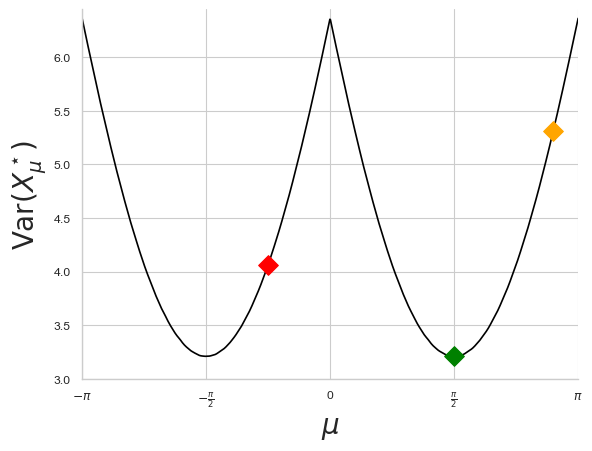

In [168]:
import numpy as np
from scipy.integrate import fixed_quad
from scipy.special import i0

C = 2 * np.pi * i0(1)


# E[d(X, p)^2] for X ~ VM(q, 1)
def vm_ff(p, q):
    def von_mises_density(theta):
        return np.exp(np.cos(theta - q)) / C

    def integrand(theta):
        inner_product = np.cos(p) * np.cos(theta) + np.sin(p) * np.sin(theta)
        inner_product = np.clip(inner_product, -1, 1)
        return np.arccos(inner_product) ** 2 * von_mises_density(theta)

    # Integrate over [0, 2π]
    result, error = fixed_quad(integrand, 0, 2 * np.pi, n=50)
    return result


# FM of the mixture of VM(p, 1) and VM(2q - p, 1)
def fm(p, q, x_vals):
    vals = [vm_ff(x, 2 * q - p) + vm_ff(x, p) for x in x_vals]
    min_idx = np.argmin(vals)
    return x_vals[min_idx], vals[min_idx]


x_vals = np.linspace(-np.pi, np.pi, 100)
x_fine = np.linspace(-np.pi, np.pi, 1000)
# variances = [fm(mu0, mu1, x_vals=x_vals)[1] for mu1 in x_fine]

plt.scatter(
    [-np.pi / 4],
    [fm(mu0, -np.pi / 4, x_vals=x_vals)[1]],
    color="red",
    marker="D",
    s=100,
    zorder=10,
)
plt.scatter(
    [9 * np.pi / 10],
    [fm(mu0, 9 * np.pi / 10, x_vals=x_vals)[1]],
    color="orange",
    marker="D",
    s=100,
    zorder=10,
)
plt.scatter(
    [mu0],
    [fm(mu0, mu0, x_vals=x_vals)[1]],
    color="green",
    marker="D",
    s=100,
    zorder=10,
)

plt.plot(
    x_fine,
    variances,
    color="black",
)
plt.xticks(
    np.linspace(-np.pi, np.pi, 5),
    [r"$-\pi$", r"$-\frac{\pi}{2}$"] + ["0"] + [r"$\frac{\pi}{2}$", r"$\pi$"],
)
plt.xlabel(r"$\mu$")
plt.xlim(-np.pi, np.pi)
plt.ylabel(r"$\text{Var}(X^\star_\mu)$")
plt.ylim(3, 6.45)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.savefig(
    "./plots/var_circle.pdf",
    bbox_inches="tight",
    transparent=True,
)